# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset includes 17 campaigns from May 2008 to November 2010, with 79,354 contacts. The campaigns offered an attractive long-term deposit application with competitive interest rates. There were 6,499 successes, resulting in an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

import warnings
warnings.filterwarnings("ignore")  # Suppress warnings from Python libraries

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Let's check data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Let's check the dimensions of the dataframe
df.shape

(41188, 21)

### Problem 3: Understanding the Features

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
# Let's check the null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

12

In [8]:
# Drop duplicate rows
df_clean = df.drop_duplicates()
df_clean.shape

(41176, 21)

y
no     0.887
yes    0.113
Name: proportion, dtype: float64


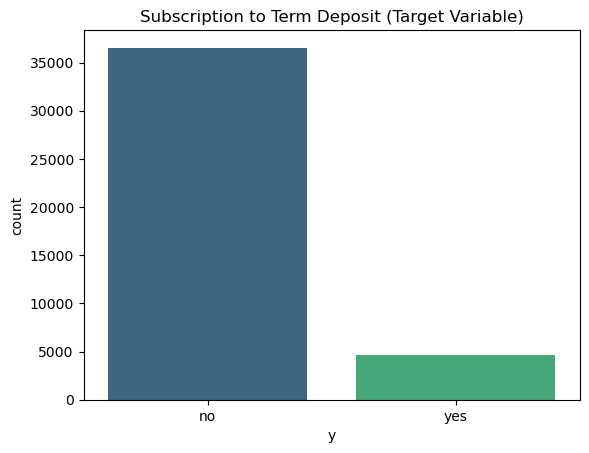

In [9]:
#Normalized value counts of y, rounded.
print(f'{df.y.value_counts(normalize=True).round(3)}')
# Visualize the target variable
sns.countplot(data=df_clean, x='y', hue='y', palette="viridis")
plt.title("Subscription to Term Deposit (Target Variable)")
plt.show()

In [10]:
# Descriptive statistics for numeric columns
print(df_clean.describe())

# Check statistics for categorical columns
print(df_clean.describe(include="object"))

               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860    

In [11]:
unknown_count = df_clean[df_clean['job'] == 'unknown'].shape[0]
print(f'Unknown jobs : {unknown_count}')

Unknown jobs : 330


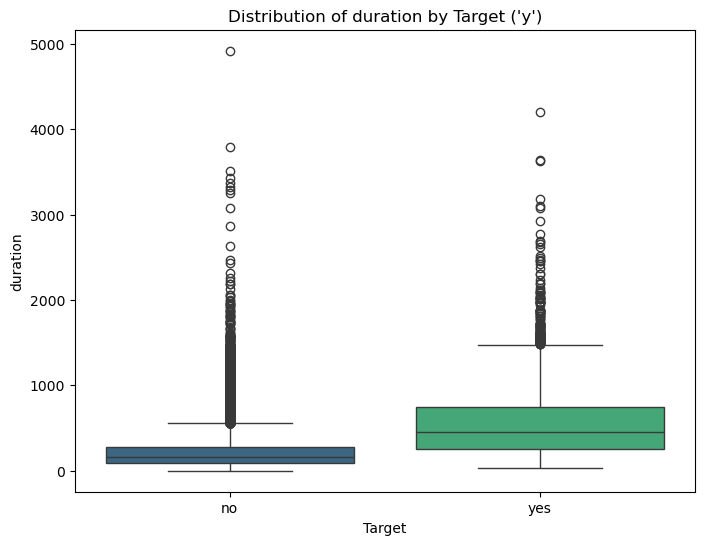

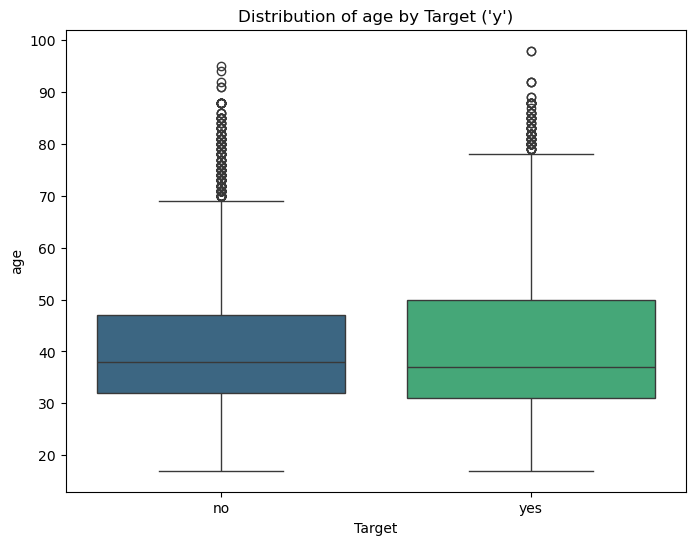

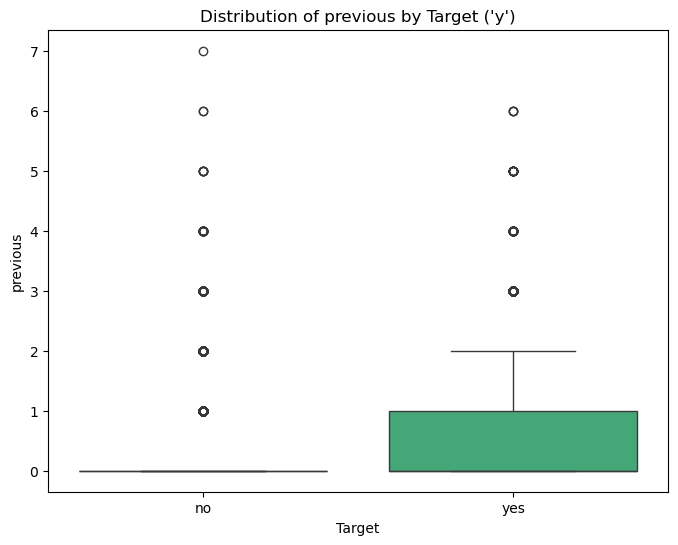

In [13]:
#visualize the distribution of numerical columns in df_clean
import seaborn as sns
import matplotlib.pyplot as plt

# numerical columns 
numerical_cols = ['duration', 'age', 'previous'] 
# Plot boxplots for each numerical column, comparing with target column 'y'
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    
    # Create the boxplot and set hue='y' directly to apply proper color mapping
    ax = sns.boxplot(data=df_clean, x='y', y=col, palette="viridis", hue='y', showfliers=True)
    
    # Customize the plot
    plt.title(f"Distribution of {col} by Target ('y')")
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

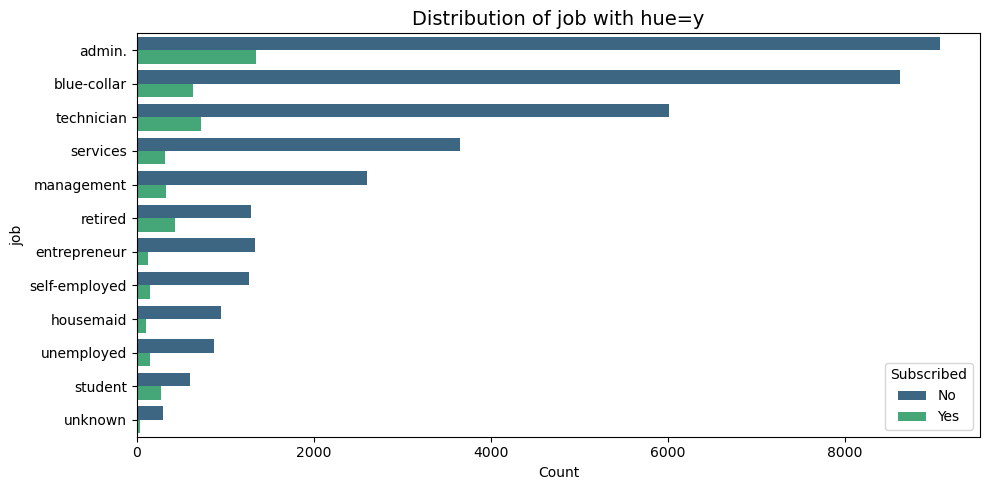

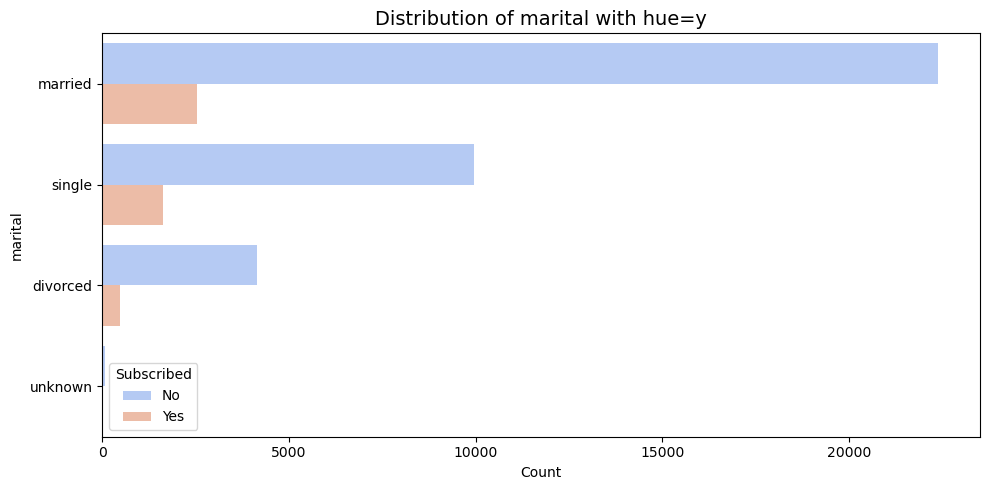

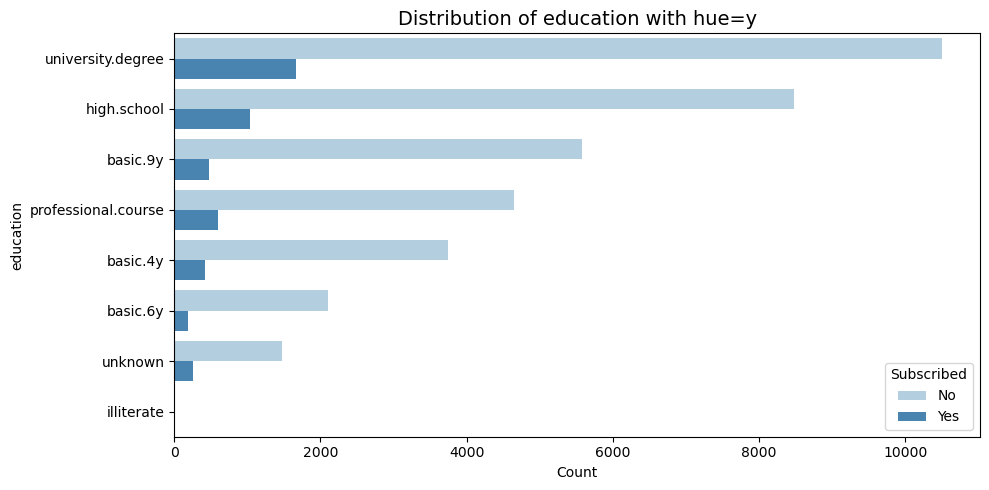

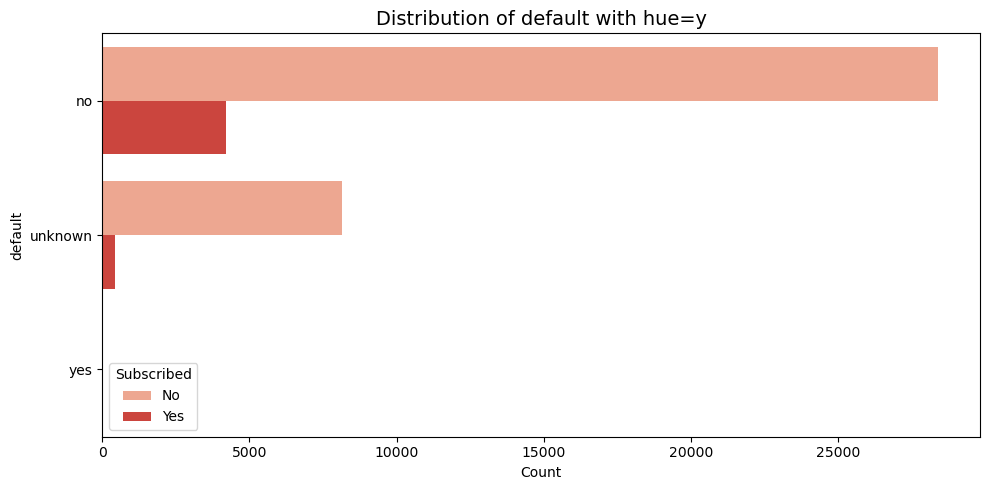

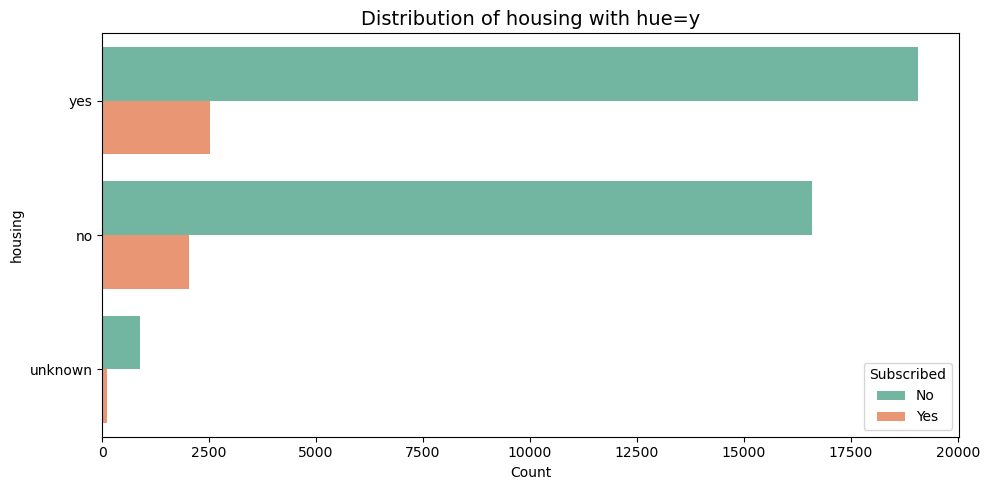

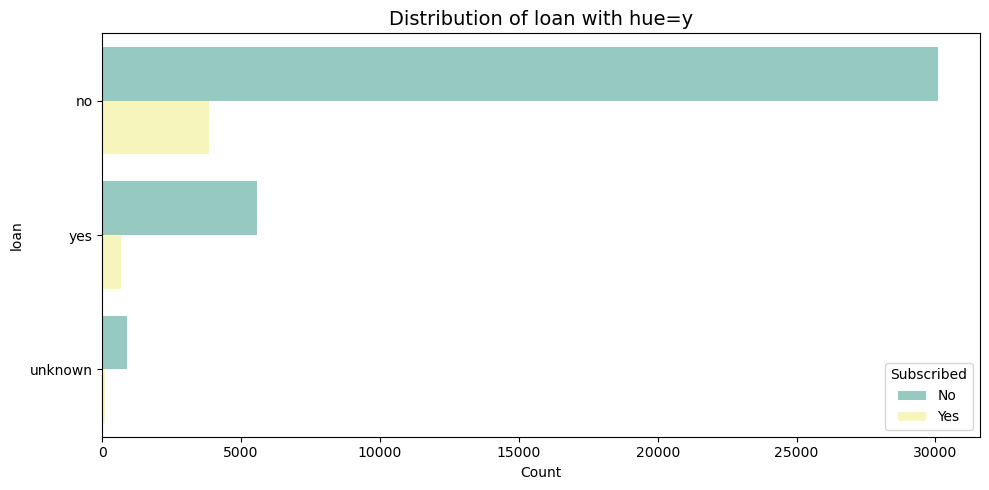

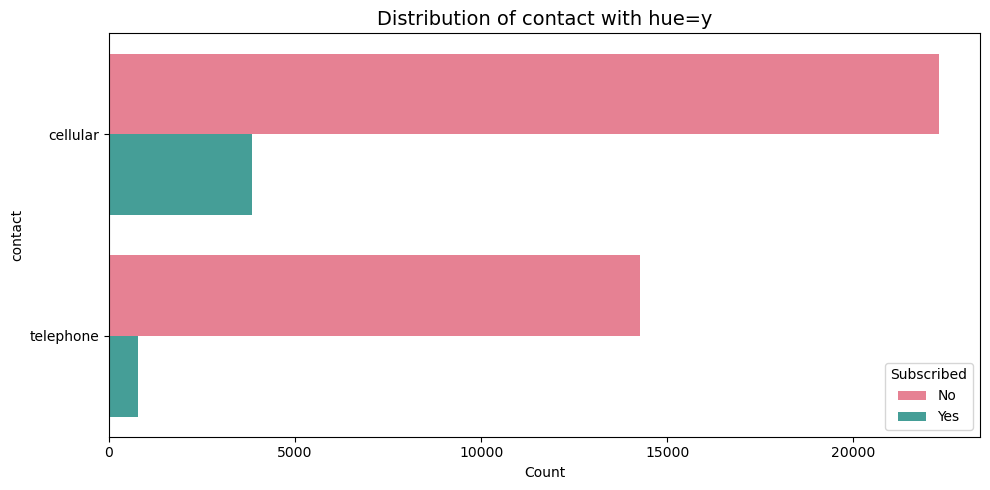

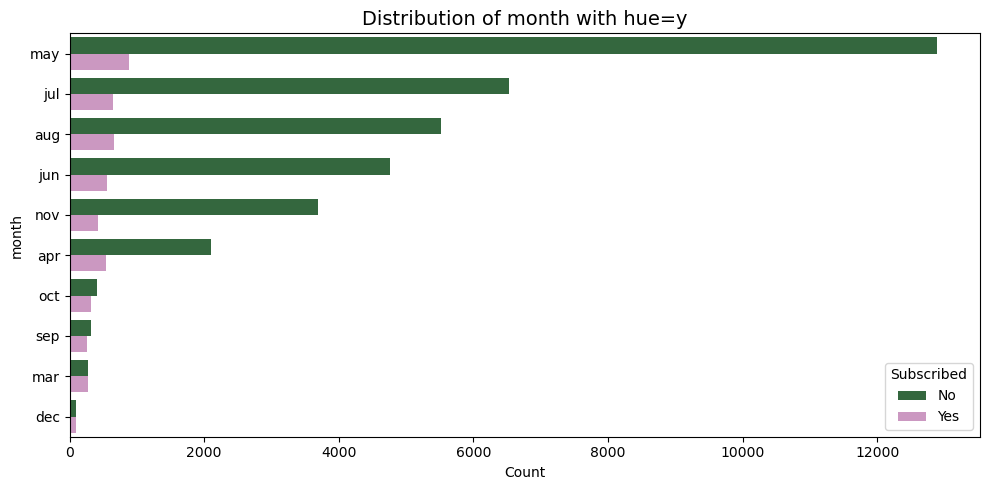

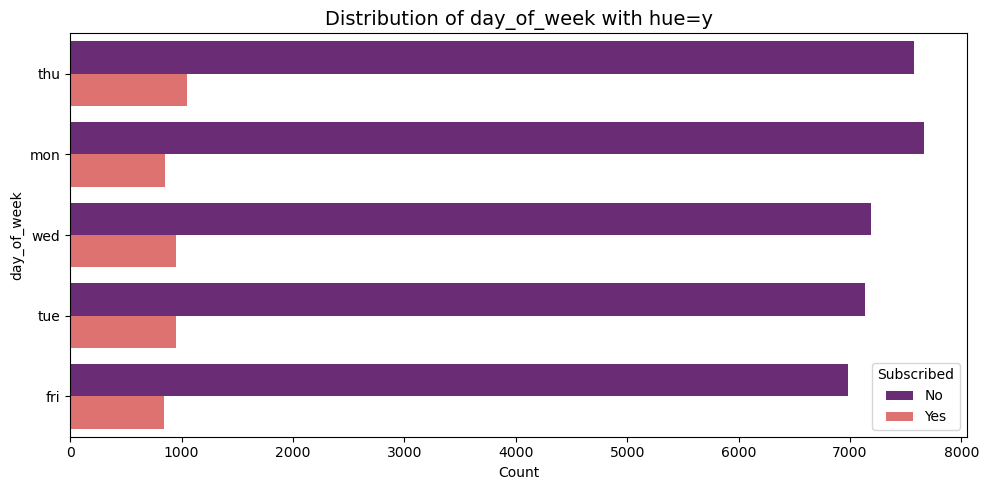

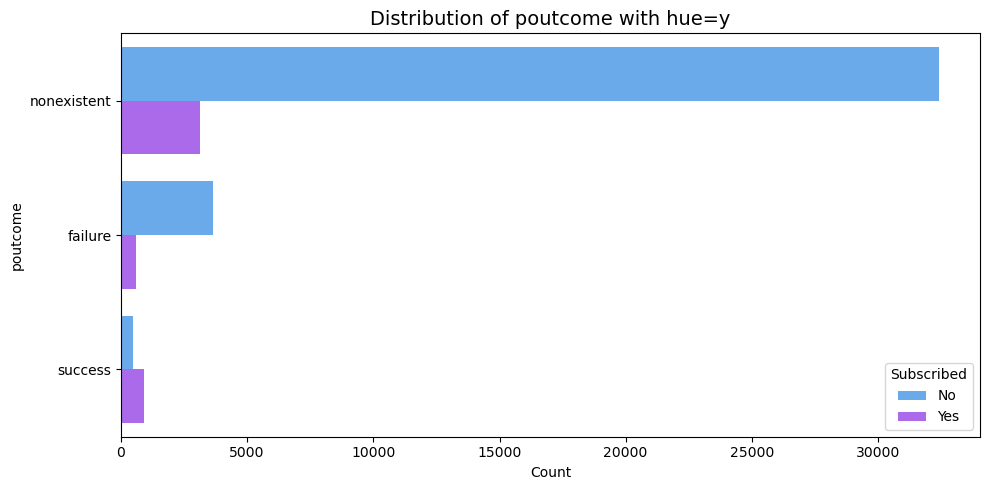

In [47]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target column 'y' from the list
categorical_columns.remove('y')

# Define a list of color palettes
palettes = [
    "viridis", "coolwarm", "Blues", "Reds", "Set2", 
    "Set3", "husl", "cubehelix", "magma", "cool"
]

# Loop through categorical columns and create plots with different palettes
for i, col in enumerate(categorical_columns):
    palette = palettes[i % len(palettes)]  # Cycle through the palettes
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], hue=df['y'], order=df[col].value_counts().index, palette=palette)
    plt.title(f'Distribution of {col} with hue=y', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='Subscribed', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


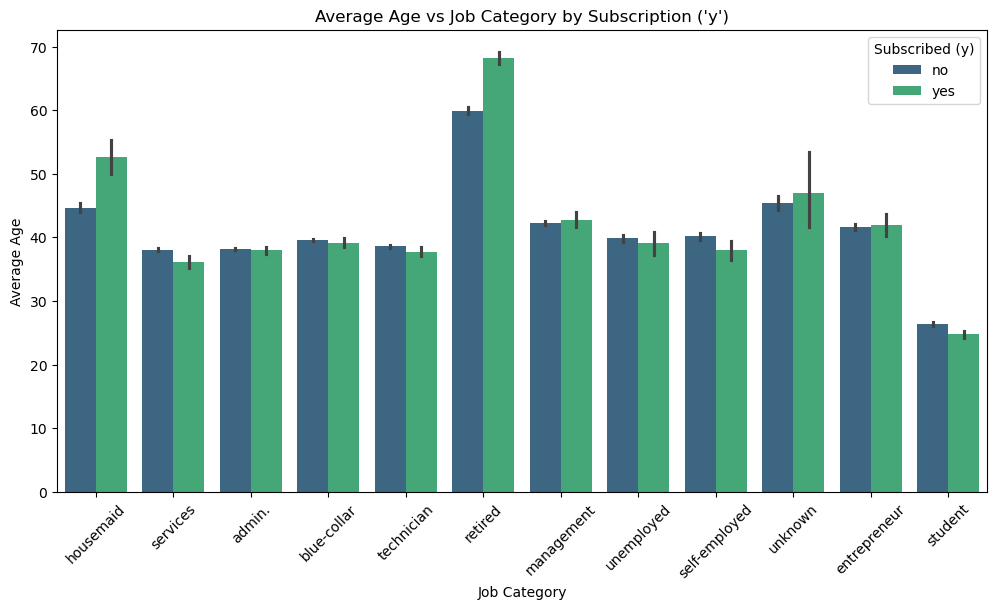

In [14]:
# Compare Age vs Job Category with subscription
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clean, x='job', y='age', hue='y', palette='viridis')

# Customizing the plot
plt.title("Average Age vs Job Category by Subscription ('y')")
plt.xlabel("Job Category")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.legend(title="Subscribed (y)", loc='upper right')

# Show the plot
plt.show()

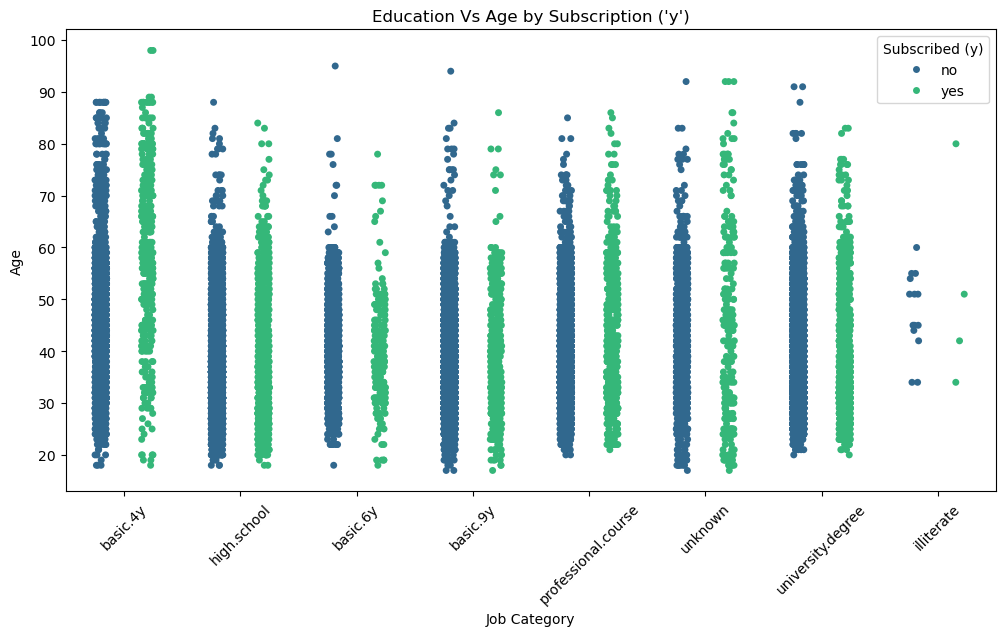

In [15]:
#Plot: Education vs age with Subscription ('y')
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_clean, x='education', y='age', hue='y', palette='viridis', jitter=True, dodge=True)
plt.title("Education Vs Age by Subscription ('y')")
plt.xlabel("Job Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.legend(title="Subscribed (y)", loc='upper right')
plt.show()

    loan education   marital    y  count
0     no  basic.4y  divorced   no    340
1     no  basic.4y  divorced  yes     68
2     no  basic.4y   married   no   2404
3     no  basic.4y   married  yes    255
4     no  basic.4y    single   no    338
..   ...       ...       ...  ...    ...
145  yes   unknown   married  yes     23
146  yes   unknown    single   no     58
147  yes   unknown    single  yes     15
148  yes   unknown   unknown   no      1
149  yes   unknown   unknown  yes      1

[150 rows x 5 columns]


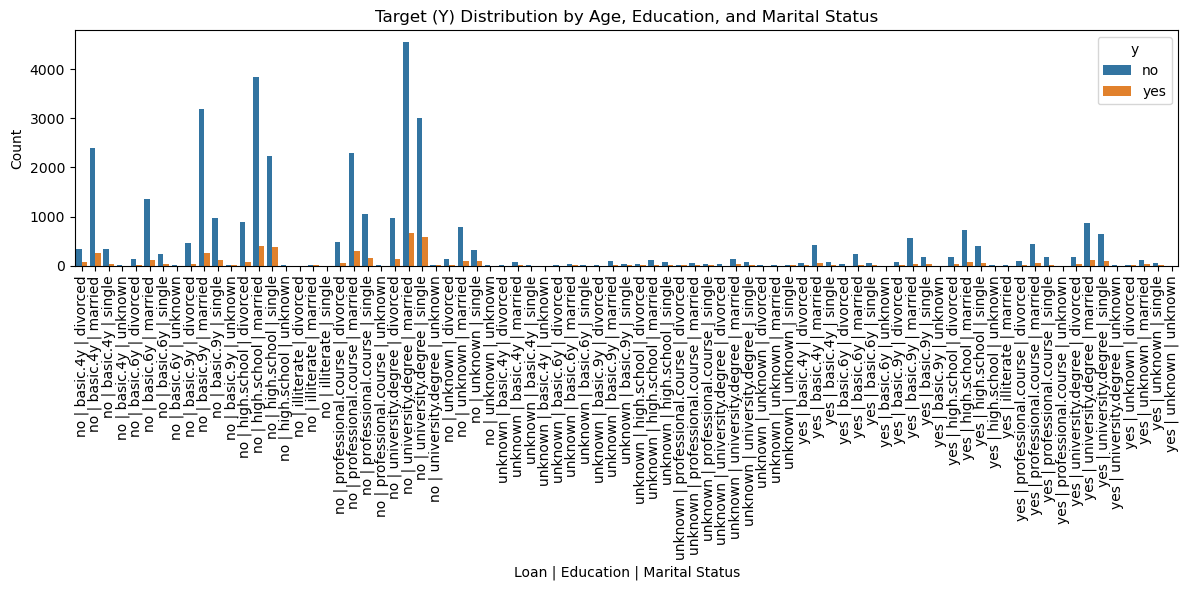

In [62]:
# Create a 'job_education_marital' column for easier plotting
# Group by 'job', 'education', 'marital' and count occurrences of 'Y'
grouped = df.groupby(['loan', 'education', 'marital', 'y']).size().reset_index(name='count')

# Check the grouped data
print(grouped)
grouped['loan_education_marital'] = grouped['loan'] + " | " + grouped['education'] + " | " + grouped['marital']

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(data=grouped, x='loan_education_marital', y='count', hue='y', dodge=True)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Title and labels
plt.title('Target (Y) Distribution by Age, Education, and Marital Status')
plt.xlabel('Loan | Education | Marital Status')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


**Problem 4: Understanding the Task**
After examining the description and data, your goal now is to clearly state the Business Objective of the task. State the objective below.

**Bussiness Objective** :

**Goal**: Predict whether a customer will subscribe to a term deposit offered by the bank.
**Target Variable**: The prediction is based on the binary outcome of subscription (yes or no).
**Customer Attributes**: Prediction is made using customer features like age, job, marital status, education, etc.
**Marketing Campaign Context**: Features also include information about how the customer was contacted and campaign details.
**Optimization of Marketing Efforts**: The bank aims to focus its marketing resources on customers who are most likely to convert.
**Cost Reduction**: By targeting likely subscribers, the bank can reduce marketing costs and avoid wasting resources.
**Improve Campaign Effectiveness**: The bank seeks to enhance the success rate of future marketing campaigns through better targeting.
**Maximize Return on Investment (ROI)**: By identifying high-potential customers, the bank can increase ROI from marketing.
**Outcome**: The business objective is to identify the most promising leads and improve the overall efficiency of marketing strategies.

**Problem 5: Engineering Features**
Now that you understand your business objective, we will build a basic model to get started. Before we can do this, we must work to encode the data. Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
# Convert 'Yes' to 1 and 'No' to 0
df_clean.loc[:, 'y_numeric'] = df_clean['y'].map({'yes': 1, 'no': 0})
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [18]:
# List of categorical columns to one-hot encode
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
columns_to_encode = [col for col in categorical_cols if col != 'y']
# Loop through the columns and apply one-hot encoding
for col in columns_to_encode:
    # Use pd.get_dummies to encode each column
    one_hot = pd.get_dummies(df_clean[col], prefix=col).astype(int)
    
    # Concatenate the one-hot encoded columns with the original DataFrame
    df_clean = pd.concat([df_clean, one_hot], axis=1)
    
    # Drop the original column from the DataFrame
    df_clean = df_clean.drop([col], axis=1)


In [19]:
#Remove outliers of age, duration, previous, campaign

# List of columns to check for outliers
columns_to_clean = ['age', 'campaign', 'duration', 'previous'] 

# Loop through each column to remove outliers
for col in columns_to_clean:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where the column value is outside the bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


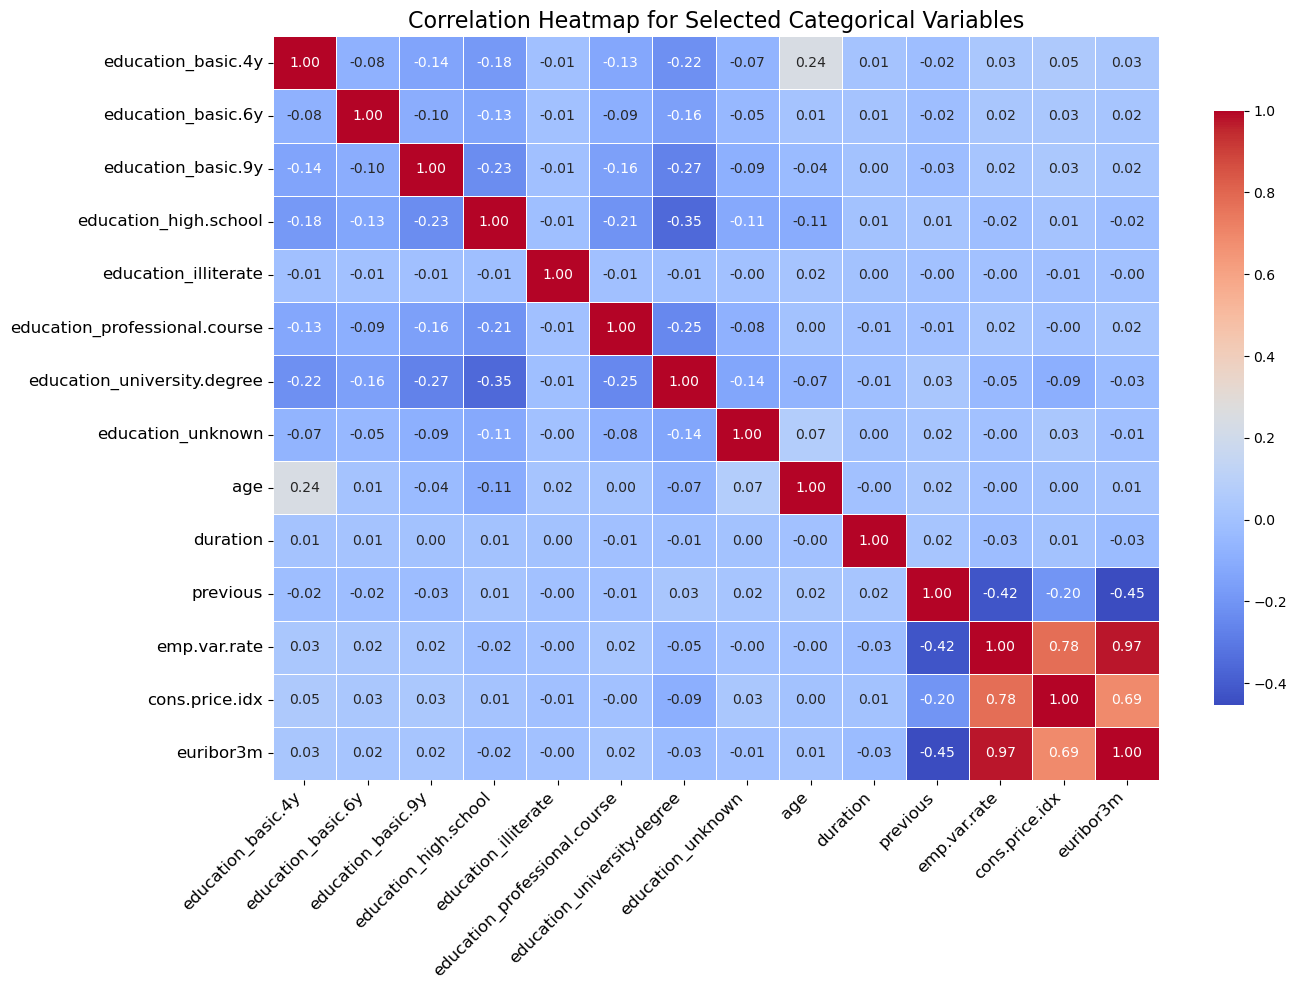

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the target column ('y' or 'y_numeric') from the dataset
# Select columns starting with 'marial', 'education', and other relevant prefixes
selected_columns = [col for col in df_clean.columns if col.startswith(('marial', 'education'))]

# Add other numerical columns to the selected list (excluding 'y' or 'y_numeric')
numerical_columns = ['age','duration','previous','emp.var.rate','cons.price.idx','euribor3m']
selected_columns.extend([col for col in numerical_columns if col != 'y' and col != 'y_numeric'])

# Create a new DataFrame with the selected columns
selected_data = df_clean[selected_columns]

# Compute the correlation matrix for the remaining columns
correlation_matrix = selected_data.corr()

# Plot the heatmap with larger figure size for better readability
plt.figure(figsize=(14, 10))  # Adjust figure size for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Adjust title and axis labels
plt.title("Correlation Heatmap for Selected Categorical Variables", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate column labels for better visibility
plt.yticks(rotation=0, fontsize=12)  # Keep row labels horizontal
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# 'y_numeric' is the target variable and the rest are features.
X = df_clean.select_dtypes(include=['int', 'float'])   
X = X.drop(['y_numeric'], axis=1) # Features (all columns except 'y_numeric')
y = df_clean['y_numeric']  # Target (subscription)

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=42)

In [ ]:
import numpy as np
# Check for missing or infinite values
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("Cleaning data...")
    X_train = np.nan_to_num(X_train)  # Replace NaNs with 0
    X_test = np.nan_to_num(X_test)

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  job_admin.                     41176 non-null  int64  
 11  job_blue-collar                41176 non-null  int64  
 12  job_entrepreneur               41176 non-null  int6

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
#DummyClassifier to fit the the training data X_train and y_train
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
from sklearn.svm import SVC
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

# Print the baseline accuracy
print("Baseline accuracy:", baseline_score)

# Generate predictions for the test set
predictions = dummy_clf.predict(X_test)

# Print some predictions (for example, the first 10)
print("Predictions:", predictions[:10])

# Calculate recall for each class
recall_class_0 = recall_score(y_test, predictions, pos_label=0)
recall_class_1 = recall_score(y_test, predictions, pos_label=1)

# Print recall scores
print("Recall for class 0:", recall_class_0)
print("Recall for class 1:", recall_class_1)

Baseline accuracy: 0.884724358455436
Predictions: [0 0 0 0 0 0 0 0 0 0]
Recall for class 0: 1.0
Recall for class 1: 0.0


In [25]:
from sklearn.svm import SVC

# Create and fit the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Get predictions on the test set
predictions = svc.predict(X_test)

# Print the predictions
print("Predictions:", predictions)

# Calculate accuracy
accuracy = svc.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate recall for each class
recall_class_0 = recall_score(y_test, predictions, pos_label=0)
recall_class_1 = recall_score(y_test, predictions, pos_label=1)

# Print recall scores
print("Recall for class 0:", recall_class_0)
print("Recall for class 1:", recall_class_1)

Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.896381445802639
Recall for class 0: 0.9839875560435538
Recall for class 1: 0.22401685393258428


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

lg_start_time = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

lg_end_time = time.time()
log_reg_train_preds = log_reg.predict(X_train_scaled)
log_reg_test_preds = log_reg.predict(X_test_scaled)

log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_train_precision = precision_score(y_train, log_reg_train_preds)
log_reg_train_recall = recall_score(y_train, log_reg_train_preds)
log_reg_train_f1 = f1_score(y_train, log_reg_train_preds)

log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)
log_reg_test_precision = precision_score(y_test, log_reg_test_preds)
log_reg_test_recall = recall_score(y_test, log_reg_test_preds)
log_reg_test_f1 = f1_score(y_test, log_reg_test_preds)

execution_time_lg = lg_start_time - lg_end_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [27]:
print(f"Total execution time: {execution_time_lg:.2f} seconds")
print(f"Logistic Regression Train Accuracy: {log_reg_train_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {log_reg_test_accuracy:.4f}")

print(f"Train Precision for Logictics Regression: {log_reg_train_precision}")
print(f"Test Precision for Logictics Regression: {log_reg_test_precision}")

print(f"TrainRecall for Logictics Regression: {log_reg_train_recall}")
print(f"Test Recall for Logictics Regression: {log_reg_test_recall}")

print(f"Train F1-Score for Logictics Regression: {log_reg_train_f1}")
print(f"Test F1-Score for Logictics Regression: {log_reg_test_f1}")

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, log_reg_test_preds))

print("\nClassification Report (Train Set):")
print(classification_report(y_train, log_reg_train_preds))

Total execution time: -0.50 seconds
Logistic Regression Train Accuracy: 0.9128
Logistic Regression Test Accuracy: 0.9081
Train Precision for Logictics Regression: 0.6698888351860802
Test Precision for Logictics Regression: 0.664391353811149
TrainRecall for Logictics Regression: 0.431104199066874
Test Recall for Logictics Regression: 0.4101123595505618
Train F1-Score for Logictics Regression: 0.5246025738077215
Test F1-Score for Logictics Regression: 0.5071645679548415

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.66      0.41      0.51      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353


Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25608
           1       0

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
import time
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Models dictionary
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42)
    },
    'KNeighbors': {
        'model': KNeighborsClassifier()
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42)  # Enable probability=True for ROC-AUC
    }
}

# DataFrame to store results
results = []

# Loop through each model
for model_name, model_info in models.items():
    model = model_info['model']
    
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilities for ROC-AUC (if supported)
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = None
        y_test_proba = None

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred, average="weighted")
    test_recall = recall_score(y_test, y_test_pred, average="weighted")
    
    if y_train_proba is not None and y_test_proba is not None:
        train_roc_auc = roc_auc_score(y_train, y_train_proba, multi_class="ovr", average="weighted")
        test_roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr", average="weighted")
    else:
        train_roc_auc = None
        test_roc_auc = None

    # Append results to the DataFrame
    results.append({
        "Model": model_name,
        "Train Time (s)": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train ROC-AUC": train_roc_auc,
        "Test ROC-AUC": test_roc_auc
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

          Model  Train Time (s)  Train Accuracy  Test Accuracy  Train Recall  \
0  DecisionTree        0.173279        1.000000       0.887477      1.000000   
1    KNeighbors        0.005187        0.931374       0.902777      0.931374   
2           SVM       60.842488        0.898588       0.896381      0.898588   

   Test Recall  Train ROC-AUC  Test ROC-AUC  
0     0.887477       1.000000      0.719592  
1     0.902777       0.965390      0.868295  
2     0.896381       0.922594      0.915616  


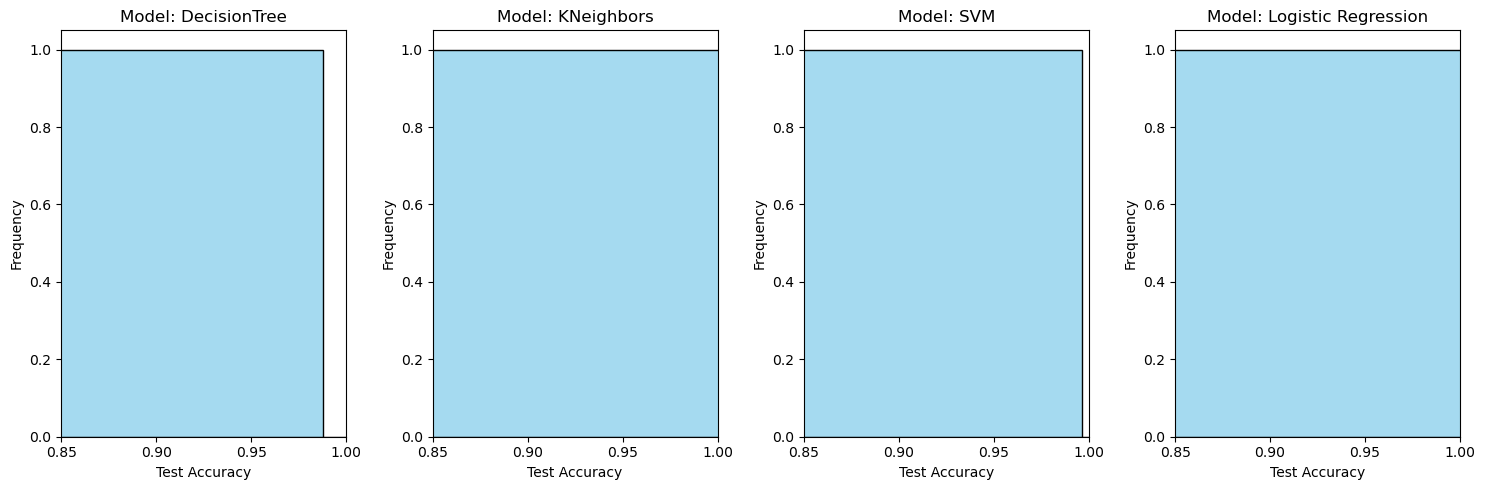

In [80]:
# Simple model output
data = {
    "Model": ["DecisionTree", "KNeighbors", "SVM", "Logistic Regression"],  # Added Logistic Regression
    "Train Time (s)": [0.173279, 0.005187, 60.842488, -0.50],  # Added train time for Logistic Regression
    "Train Accuracy": [1.000000, 0.931374, 0.898588, 0.9128],  # Added Train Accuracy for Logistic Regression
    "Test Accuracy": [0.887477, 0.902777, 0.896381, 0.9081],  # Added Test Accuracy for Logistic Regression
    "Train Recall": [1.000000, 0.931374, 0.898588, 0.4311],  # Added Train Recall for Logistic Regression
    "Test Recall": [0.887477, 0.902777, 0.896381, 0.4101],  # Added Test Recall for Logistic Regression
    "Train ROC-AUC": [1.000000, 0.965390, 0.922594, 0.9311],  # Added Train ROC-AUC for Logistic Regression
    "Test ROC-AUC": [0.719592, 0.868295, 0.915616, 0.9311]  # Added Test ROC-AUC for Logistic Regression
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot histograms for each model's "Test Accuracy"
plt.figure(figsize=(15, 5))

for i in range(len(df)):
    plt.subplot(1, 4, i + 1)  # Create subplots (1 row, 4 columns) for the 4 models
    sns.histplot([df["Test Accuracy"][i]], bins=5, kde=False, color="skyblue")  # Histogram
    plt.title(f"Model: {df['Model'][i]}", fontsize=12)  # Title with model name
    plt.xlabel("Test Accuracy")
    plt.ylabel("Frequency")
    plt.xlim(0.85, 1.0)  # Adjust x-axis for uniformity
    plt.tight_layout()

plt.show()



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [69]:
import sklearn
print(sklearn.__version__) 

1.4.2


In [74]:
import warnings
# Define the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1.0, 10],            # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers compatible with binary classification
    'penalty': ['l2'],                # L2 regularization
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_regression_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Use ROC-AUC for binary classification
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available CPU cores
    verbose=0           # No detailed logs for a clean output
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print results
print("\nLogistic Regression Results (Binary Classification):")
print("Best Parameters:", best_params)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")



Logistic Regression Results (Binary Classification):
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.9070
Test Precision: 0.6590
Test Recall: 0.4003
Test ROC-AUC: 0.9311


In [32]:
# Models with parameters
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'random_state': 42,
            'max_depth': None
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': 5,
            'weights': 'uniform'
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'kernel': 'rbf',
            'C': 1.0,
            'random_state': 42
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': 100,
            'max_depth': None,
            'random_state': 42
        }
    }
}

# DataFrame to store results
results = []

# Loop through each model
for model_name, model_info in models.items():
    model = model_info['model']
    params = model_info.get('params', {})
    
    # Display model name and parameters
    print(f"Training {model_name} with parameters: {params}")
    
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilities for ROC-AUC (if supported)
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = None
        y_test_proba = None

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred, average="weighted")
    test_recall = recall_score(y_test, y_test_pred, average="weighted")
    
    if y_train_proba is not None and y_test_proba is not None:
        train_roc_auc = roc_auc_score(y_train, y_train_proba, multi_class="ovr", average="weighted")
        test_roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr", average="weighted")
    else:
        train_roc_auc = None
        test_roc_auc = None

    # Append results to the DataFrame
    results.append({
        "Model": model_name,
        "Parameters": params,
        "Train Time (s)": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train ROC-AUC": train_roc_auc,
        "Test ROC-AUC": test_roc_auc
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


Training DecisionTree with parameters: {'random_state': 42, 'max_depth': None}
Training KNeighbors with parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Training SVM with parameters: {'kernel': 'rbf', 'C': 1.0, 'random_state': 42}
Training RandomForest with parameters: {'n_estimators': 100, 'max_depth': None, 'random_state': 42}
          Model                                         Parameters  \
0  DecisionTree            {'random_state': 42, 'max_depth': None}   
1    KNeighbors           {'n_neighbors': 5, 'weights': 'uniform'}   
2           SVM    {'kernel': 'rbf', 'C': 1.0, 'random_state': 42}   
3  RandomForest  {'n_estimators': 100, 'max_depth': None, 'rand...   

   Train Time (s)  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
0        0.166600        1.000000       0.887477      1.000000     0.887477   
1        0.006283        0.931374       0.902777      0.931374     0.902777   
2       64.344600        0.898588       0.896381      0.898588     0.896381  

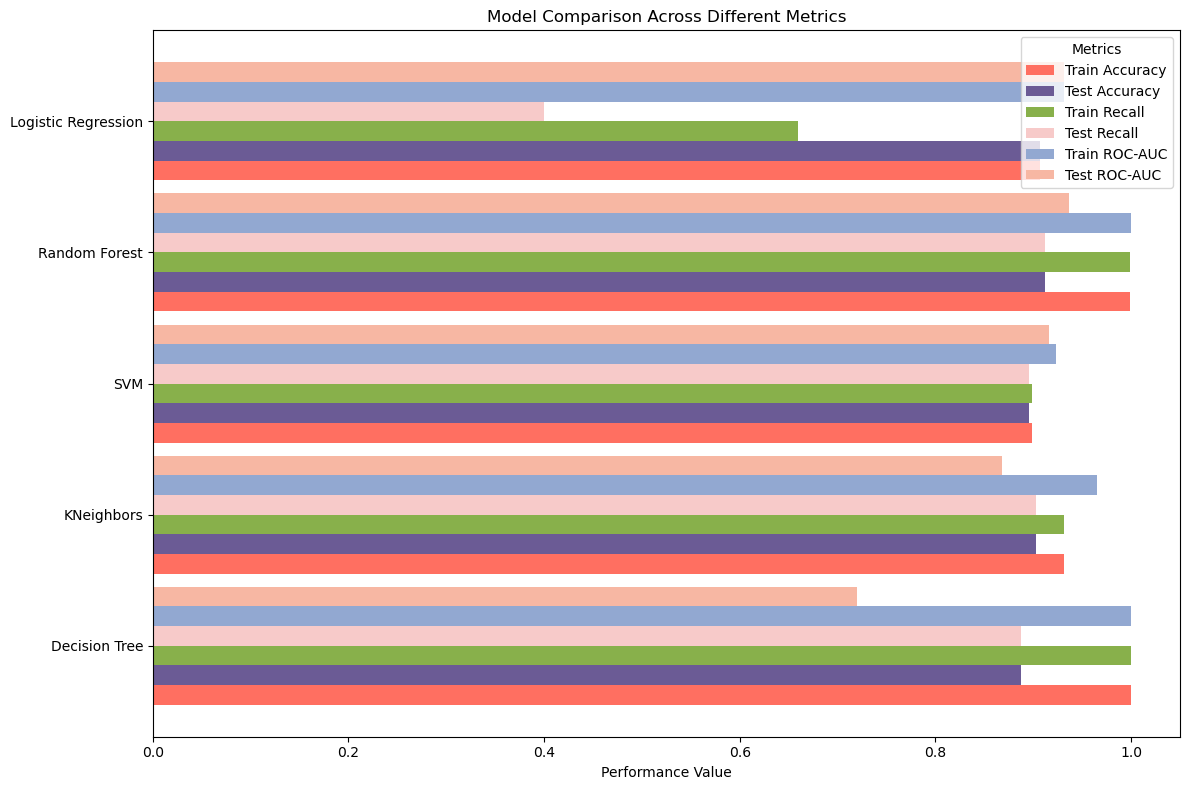

In [76]:
# Data for the models and metrics
models = ['Decision Tree', 'KNeighbors', 'SVM', 'Random Forest', 'Logistic Regression']
metrics = ['Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall', 'Train ROC-AUC', 'Test ROC-AUC']

# Values for each model (including Logistic Regression results)
values = [
    [1.000, 0.887, 1.000, 0.887, 1.000, 0.720],  # Decision Tree
    [0.931, 0.903, 0.931, 0.903, 0.965, 0.868],  # KNeighbors
    [0.899, 0.896, 0.899, 0.896, 0.923, 0.916],  # SVM
    [0.999, 0.912, 0.999, 0.912, 1.000, 0.937],  # Random Forest
    [0.907, 0.907, 0.659, 0.4003, 0.9311, 0.9311],  # Logistic Regression (new)
]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define positions of bars on the y-axis
y_pos = np.arange(len(models))

# Set bar width
bar_width = 0.15

# Bar colors for each metric
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#F7B7A3']

# Plotting the bars for each model and metric
for i, metric in enumerate(metrics):
    ax.barh(y_pos + i * bar_width, [values[j][i] for j in range(len(models))],
            height=bar_width, label=metric, color=colors[i])

# Labels and titles
ax.set_yticks(y_pos + 2.5 * bar_width)
ax.set_yticklabels(models)
ax.set_xlabel('Performance Value')
ax.set_title('Model Comparison Across Different Metrics')

# Add legend
ax.legend(title='Metrics', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


**Analysis of the Models**

**Random Forest** is the best model, excelling in Test Accuracy (0.912), Test Recall (0.912), and Test ROC-AUC (0.937).
**Logistic Regression** offers solid Test Accuracy (0.907) and Test ROC-AUC (0.9311), but lags in Test Recall (0.4003).
**KNeighbors** performs well with Test Accuracy (0.903), but Random Forest outperforms it in recall and ROC-AUC.
**SVM** has good Test Accuracy (0.896) and Test ROC-AUC (0.916), but its Test Recall (0.896) is slightly behind Random Forest.
**Decision Tree** has high train metrics, but fails in generalization with low Test Accuracy (0.887) and ROC-AUC (0.720).
Best model for overall performance: Random Forest.
For interpretability: Logistic Regression is a simpler but less effective option in recall.

##### Questions